# Data Visualization - Career and Technology Trends in Developer Survey

# Objectives:
* To analyze and visualize key trends from the developer survey dataset.
* To understand respondent demographics such as age, role, and experience.
* To explore compensation patterns across different age groups.
* To examine time spent searching and answering programming questions.
* To identify popular technologies and databases respondents wish to learn.
* To present insights using clear and user-friendly data visualizations.

##  Step 1: Install and Import Necessary Python Libraries

In [1]:

# Install Pandas library for data handling
!pip install pandas

# Install Matplotlib library for data visualization
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3            # Connecting Python to an SQLite Database


## Step 2: Download the survey dataset

In [2]:
#  Download the survey dataset
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2026-01-17 23:34:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  46.4MB/s    in 3.5s    

2026-01-17 23:34:10 (43.9 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



## Step 3: Read the CSV File into a Pandas DataFrame

In [3]:
# Read the CSV File into a Pandas DataFrame

# Read the CSV file
df = pd.read_csv('survey-data.csv')

#  Set pandas option to display all columns
pd.set_option('display.max_columns', None)


# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

** CSV file successfully loaded into Pandas DataFrame.****

## Step 4: Create a SQLite Database and Insert the Data

In [4]:

# Step 1: Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace' , index= False)


# Step 3:  Close the connection
conn.close()
print("Connection closed")


Connection closed



## Step 5:  Verify that the data has been correctly inserted into the SQLite database 

In [5]:
#  Verify the Data in the SQLite Database by running a simple query:

# Step 1: Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check.head(2))


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   

                                        EdLevel  \
0                     Primary/elementary school   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   

                                     LearnCodeOnline  \
0                                               None   
1  Technical documentation;Blogs;Books;Written Tu...

*** The query was executed successfully, and the results confirm that the data was inserted into the database.***

## Step 6: Count the number of rows in the Database Table


In [6]:
# Count the number of rows in the table named 'main'
QUERY = " SELECT COUNT(*) FROM main"
         
df_count = pd.read_sql_query(QUERY , conn)
df_count


,COUNT(*)
0,65437


### Key Insights:
* The query result shows that 65,437 records were successfully stored in the database table.
* pd.read_sql_query() always returns a DataFrame so we used df_count.

## Step 7: Listing All Tables

In [7]:
# To view the names of all tables in the database:
QUERY = """ SELECT name AS Table_Name 
         FROM sqlite_master
         WHERE type='table'"""
df_tables = pd.read_sql_query(QUERY , conn)
df_tables

,Table_Name
0,main


#### *** Database contains one table named main.****

## Step 8:  Display column names and schema (structure)from SQLite table

In [8]:
# View Column Names Using an SQL Query
QUERY = "PRAGMA table_info(main);"
pd.read_sql_query(QUERY, conn)


,cid,name,type,notnull,dflt_value,pk
0,0,ResponseId,INTEGER,0,None,0
1,1,MainBranch,TEXT,0,None,0
2,2,Age,TEXT,0,None,0
3,3,Employment,TEXT,0,None,0
4,4,RemoteWork,TEXT,0,None,0
...,...,...,...,...,...,...
109,109,JobSatPoints_11,REAL,0,None,0
110,110,SurveyLength,TEXT,0,None,0
111,111,SurveyEase,TEXT,0,None,0
112,112,ConvertedCompYearly,REAL,0,None,0


## Step 9: Running a Group By Query ( Group Respondents by Age and Count Records)


In [9]:
# Group Respondents by Age and Count Records
QUERY = """SELECT Age, COUNT(*) as count 
         FROM main 
         GROUP BY Age
         ORDER BY Age """
df_agegroup = pd.read_sql_query(QUERY , conn)
df_agegroup

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


### Key Insights:
* Most respondents are in the 25–34 age group.
* 18–24 is the second largest group.
* Participation drops after age 45.
* The survey mainly rep

## Step 8:  Displayed the schema of the main table (column names and data types)
Use  query to get the schema of a specific table, main in this case:

In [10]:
# Retrieve Table Creation SQL from sqlite_master
table_name = 'main' 
QUERY = """
SELECT sql FROM sqlite_master 
WHERE name = '{}'                    
""".format(table_name)

df_main = pd.read_sql_query(QUERY, conn)
print(df_main.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


#### *** The output shows the schema of the main table, listing all column names and their data types stored in the SQLite database.

# --------------Visualizing the Distribution of Data --------------------
#  Histograms 
## Step 9 :Plot a histogram of CompTotal (Total Compensation).

In [11]:
#  Checked data type, missing values, and outliers in CompTotal before visualization

# Step 1: Check if Column Exists
'CompTotal' in df.columns

True

In [12]:
# Step 2: Check for missing values
df['CompTotal'].isna().sum()

np.int64(31697)

#### *** 31,697 respondents did not provide total compensation data.

In [13]:
# Step 3: Remove missing values
comp_data =df[['CompTotal']].dropna()

# Verify
comp_data.isna().sum()

CompTotal    0
dtype: int64

In [14]:
# Step 4: Check data type -Ensure the column is numeric.
comp_data.dtypes

CompTotal    float64
dtype: object

* The CompTotal column is already numeric.
* float64 is a standard numeric data type used for decimal numbers.

In [15]:
# Step 5: Check basic statistics - Understand min, max, average, spread.
comp_data[['CompTotal']].describe().round(0).astype(int)

,CompTotal
count,33740
mean,-9223372036854775808
std,-9223372036854775808
min,0
25%,60000
50%,110000
75%,250000
max,-9223372036854775808


The median compensation is 110,000, and most respondents earn between 60,000 and 250,000. However, extreme outliers inflate the mean and maximum values, so outlier treatment is required before meaningful salary analysis.

In [16]:
# Step 6: checks for outliers before removing them.

# Step 6.1: To check lowest values:
comp_data.sort_values(by='CompTotal', ascending=True).head(10)

,CompTotal
65153,0.0
16385,0.0
27087,0.0
36981,0.0
27230,0.0
63726,0.0
63606,0.0
12980,0.0
39629,0.0
1930,0.0


### *** Zero values in CompTotal represent non-paid or missing salary entries and should be excluded from compensation analysis.

In [17]:
# Step 6.2: To check highest values:
pd.options.display.float_format = '{:,.0f}'.format   # Format numbers  for userfriendly
comp_data.sort_values(by='CompTotal', ascending=False).head(10)

,CompTotal
14354,"1,000,000,000,000,000,162,545,277,246,339,097,2..."
34278,"99,999,999,999,999,999,209,038,626,283,633,850,..."
17374,"99,999,999,999,999,999,322,094,867,436,162,797,..."
8814,"100,000,000,000,000,008,821,361,405,306,422,640..."
20037,"8,000,000,000,000,000,106,300,440,576"
24677,"100,000,000,000,000,000,000"
27268,"1,111,111,111,111,111"
52485,"304,030,202,020,221"
46992,"75,874,587,587,576"
59887,"7,777,777,777,777"


### *** The top CompTotal values are unrealistically high, showing clear outliers caused by incorrect data entry; these will be excluded from further analysis.

In [18]:
# Step 7: Removing Outliers from the Dataset
# Step 7.1: Calculate Q1, Q3, and IQR


Q1 = comp_data['CompTotal'].quantile(0.25)
Q3 = comp_data['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 60000.0
Q3: 250000.0
IQR: 190000.0


### Key Insights:
* Q1 (60,000) means 25% of respondents reported compensation below 60,000 in their local currency.
* Q3 (250,000) means 75% reported compensation below 250,000 in their local currency.
* The middle 50% reported compensation between 60,000 and 250,000.

In [19]:
# Step 8:  Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower bound:", lower_bound)
print("upper_bound :", upper_bound)


lower bound: -225000.0
upper_bound : 535000.0


#### *** Any compensation below -225,000 or above 535,000 is considered an outlier using the IQR method

In [20]:
# Step 9: Identify Outliers
iqr_outliers = comp_data[
    (comp_data['CompTotal'] < lower_bound) |
    (comp_data['CompTotal'] > upper_bound)
]

print("Number of outliers detected:", iqr_outliers.shape[0])


Number of outliers detected: 5876


In [21]:
# Step 10: Remove Outliers and Create Refined Dataset

comp_data_no_outliers = comp_data[
    (comp_data['CompTotal'] >= lower_bound) &
    (comp_data['CompTotal'] <= upper_bound)
]

print("Original dataset size:", comp_data.shape[0])
print("Refined dataset size:", comp_data_no_outliers.shape[0])


Original dataset size: 33740
Refined dataset size: 27864


#### *** The refined dataset contains 27,864 records, which is sufficient to produce a reliable histogram and visualize the compensation distribution.

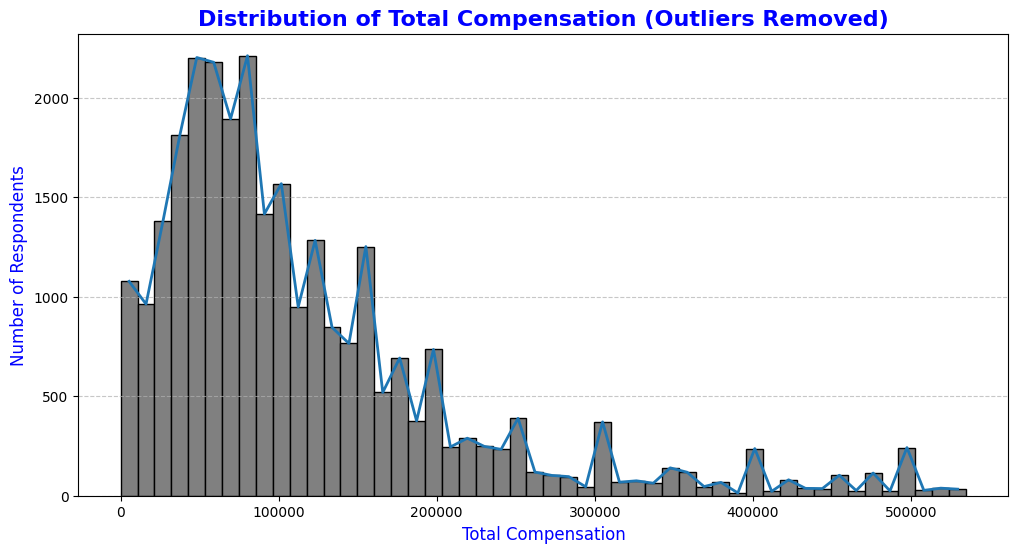

In [22]:
# Step 11: Histogram of Total Compensation After Outlier Treatment
data = comp_data_no_outliers['CompTotal']

plt.figure(figsize=(12,6))

# Histogram bars with soft green tone
counts, bins, _ = plt.hist(
    data, 
    bins=50, 
    edgecolor='black',
    color='gray'   # soft teal-green
)

# Frequency line
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, counts, linewidth=2)

# Titles and labels
plt.title("Distribution of Total Compensation (Outliers Removed)", fontsize=16, fontweight='bold',color="blue")
plt.xlabel("Total Compensation", fontsize=12,color="blue")
plt.ylabel("Number of Respondents", fontsize=12, color="blue")

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Key Insights:
* The chart shows how total compensation is spread among respondents.
* absMost people earn in the lower to middle salary ranges.
* Very high salaries are rare.

## Step 10: Create a Box Plot that shows how the Age data is distributed in the dataset
# Boxplot

In [23]:
#  Checked existence, data type, unique values, and missing entries in Age column before visualization

# Step 1: Check if the Age column exists
'Age' in df.columns

True

In [24]:
# Step 2: Check data type of Age
df['Age'].dtype

dtype('O')

#### ** The Age column is stored as text, not numbers. A box plot needs numeric data to calculate. So we must convert Age to numbers first before plotting a box plot.

In [25]:
# Step 3: Inspect unique values
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [26]:
# Step 4: Check for missing values
df['Age'].isna().sum()

np.int64(0)

In [27]:
# Step 4: Convert Age Groups to Numeric Midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Create numeric Age column
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Check conversion
df[['Age', 'Age_Numeric']].head()

,Age,Age_Numeric
0,Under 18 years old,17
1,35-44 years old,40
2,45-54 years old,50
3,18-24 years old,21
4,18-24 years old,21


#### The Age column was successfully converted from text age groups into numeric midpoint values, making it suitable for numerical analysis and box plot visualization.

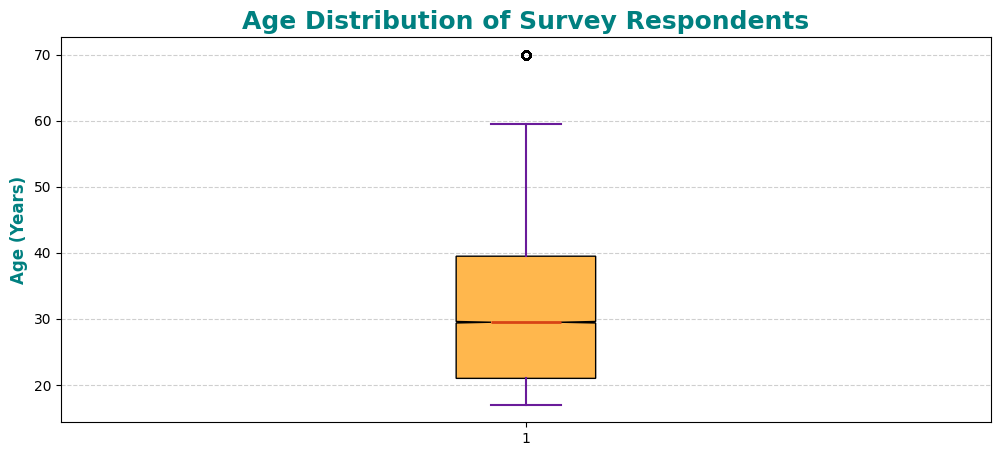

In [28]:
# Step 5: Box plot for Age Distribution of Survey Respondents

plt.figure(figsize=(12,5))

# Create box plot
box = plt.boxplot(
    df['Age_Numeric'].dropna(),
    notch=True,
    patch_artist=True,   # Allows color filling
    showfliers=True
)

# Fill box with soft color
for patch in box['boxes']:
    patch.set_facecolor('#FFB74D')   # soft orange

# Color median line
for median in box['medians']:
    median.set(color='#D84315', linewidth=2)

# Color whiskers and caps
for whisker in box['whiskers']:
    whisker.set(color='#6A1B9A', linewidth=1.5)

for cap in box['caps']:
    cap.set(color='#6A1B9A', linewidth=1.5)

# Titles and labels
plt.title("Age Distribution of Survey Respondents", fontsize=18, fontweight='bold',color="teal")
plt.ylabel("Age (Years)", fontsize=12, fontweight='bold',color="teal" )

# Light grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()



### Key Insights:
The box plot shows the age distribution of survey respondents. Most respondents are between about 20 and 40 years old, with the typical (median) age around 30. A few respondents are in the older age range, shown as outliers.

# -------------------- Visualizing Relationships in Data-------------------------
# Scatter Plots

## Step 11: Create a scatter plot of Age and WorkExp.

In [29]:
# Verified existence, data type, missing values, and outliers for Age and WorkExp before scatter plot

# Step 1: Check if both columns exist
'Age' in df.columns and 'WorkExp' in df.columns

True

In [30]:
# Step 2: Check data types
df['Age'].dtype

dtype('O')

In [31]:
df['WorkExp'].dtype

dtype('float64')

#### Note: Age is not numerical so are taking   already created df['Age_Numeric'].

In [32]:
# Step 3: Check missing values
df[['Age_Numeric', 'WorkExp']].isna().sum()

Age_Numeric      322
WorkExp        35779
dtype: int64

In [33]:
# Step 4: Inspect basic statistics
df[['Age_Numeric', 'WorkExp']].describe().round(0).astype(int)


,Age_Numeric,WorkExp
count,65115,29658
mean,33,11
std,11,9
min,17,0
25%,21,4
50%,30,9
75%,40,16
max,70,50


* There are 65,115 valid age records and 29,658 valid work experience records.
* The average age of respondents is about 33 years.
* The median age is 30 years, meaning a typical respondent is around 30.
* The average work experience is about 11 years.
* Most respondents have between 4 and 16 years of work experience.
* The maximum reported work experience is 50 years, which is realistic for older respondents.

In [34]:
# Step 5: Remove rows with missing values
scatter_data = df[['Age_Numeric', 'WorkExp']].dropna()

# Verify
scatter_data.isna().sum()

Age_Numeric    0
WorkExp        0
dtype: int64

In [35]:
# Step 6: Verify number of records
print("Rows before cleaning:", df[['Age_Numeric', 'WorkExp']].shape[0])
print("Rows after cleaning:", scatter_data.shape[0])

Rows before cleaning: 65437
Rows after cleaning: 29611


#### After removing missing values, 29,611 complete records remain for analyzing the relationship between age and work experience.

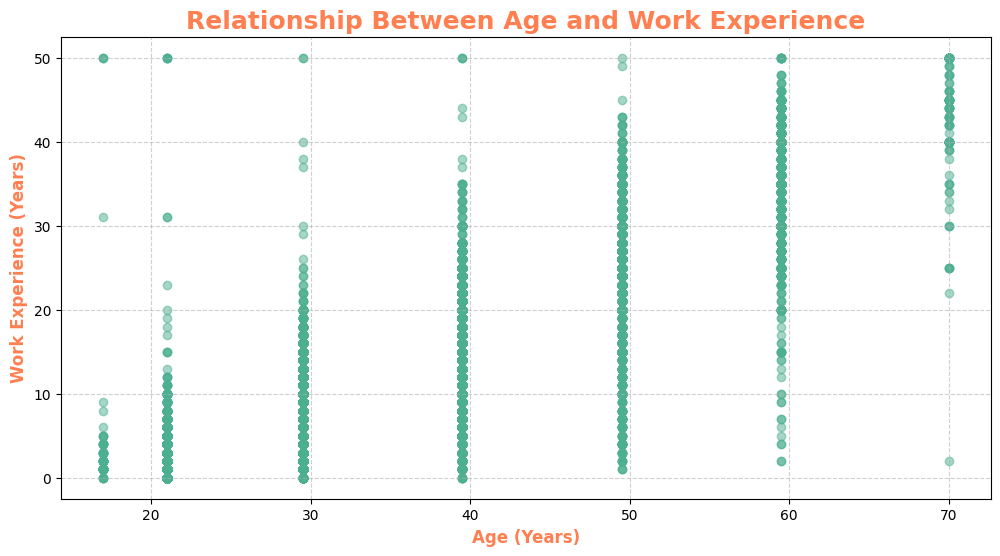

In [36]:
# Step 7: Scatter Plot of Age vs Work Experience
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Scatter plot
plt.scatter(
    scatter_data['Age_Numeric'],
    scatter_data['WorkExp'],
    alpha=0.5,
    color='#4CAF90' 
)

# Titles and labels
plt.title("Relationship Between Age and Work Experience", fontsize=18, fontweight='bold', color="coral")
plt.xlabel("Age (Years)", fontsize=12,fontweight='bold', color="coral" )
plt.ylabel("Work Experience (Years)", fontsize=12,fontweight='bold', color="coral" )

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


### Key Insights:
#### The scatter plot shows that work experience increases with age, confirming a positive relationship between the two variables.

## Step 12: Create a bubble plot of TimeSearching and Frustration using the Age column as the bubble size.
# Bubble Plots

In [37]:
# # Verified data types, missing values, and value ranges for bubble plot variables
# Step 1: Check column existence
'TimeSearching' in df.columns and 'Frustration' in df.columns and 'Age_Numeric' in df.columns

True

In [38]:
# Step 2: Check data types
df[['TimeSearching', 'Frustration', 'Age_Numeric']].dtypes

TimeSearching     object
Frustration       object
Age_Numeric      float64
dtype: object

#### TimeSearching and Frustration are categorical text variables, so they must be mapped to numeric scales before creating a bubble plot.

In [39]:
# Step 3: Check unique values before converting to numeric
# 3.1:
df['TimeSearching'].value_counts()

TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64

In [40]:
# 3.2:
df['Frustration'].value_counts()

Frustration
None of these                                                                                                                                                                                                                                              2364
Amount of technical debt                                                                                                                                                                                                                                   2067
Amount of technical debt;Reliability of tools/systems used in work                                                                                                                                                                                          831
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build                                                                                                                         

### Key Insights:
* TimeSearching is clean, single-choice categorical data.So it is easy to convert into numeric scale:
* But Frustration is a multi-select text field and must be processed differently before it can be used in a bubble plot.

In [41]:
# Step 4: Convert Frustration into a numeric count of frustration factors per respondent.
# 4.1: Create Frustration_Count
df['Frustration_Count'] = df['Frustration'].fillna('').apply(
    lambda x: 0 if x == '' else len(x.split(';'))
)

# Verify
df[['Frustration', 'Frustration_Count']].head()


,Frustration,Frustration_Count
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


* Missing frustration responses are now correctly treated as zero
* Column is clean and numeric
* Ready for analysis and plotting

In [42]:
# Step 5: Convert TimeSearching to Numeric Scale
time_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}

df['TimeSearching_Numeric'] = df['TimeSearching'].map(time_mapping)

# Check sample mapping ( numeric conversion(Verify numeric conversion )
df[['TimeSearching', 'TimeSearching_Numeric']].dropna().head(10)


,TimeSearching,TimeSearching_Numeric
10,30-60 minutes a day,3
12,30-60 minutes a day,3
15,60-120 minutes a day,4
18,15-30 minutes a day,2
20,Less than 15 minutes a day,1
22,60-120 minutes a day,4
24,15-30 minutes a day,2
26,30-60 minutes a day,3
27,60-120 minutes a day,4
31,60-120 minutes a day,4


#### TimeSearching text values were correctly mapped to numeric codes (1–5).

In [43]:
# Step 6: Check missing values
df[['TimeSearching_Numeric', 'Frustration_Count', 'Age_Numeric']].isna().sum()

TimeSearching_Numeric    36526
Frustration_Count            0
Age_Numeric                322
dtype: int64

#### TimeSearching and Frustration contain many missing responses, so only complete records are used for the bubble plot.

In [44]:
# Step 7: Prepare data
plot_data = df[['TimeSearching_Numeric', 'Frustration_Count', 'Age_Numeric']].dropna()

# Verify
plot_data[['TimeSearching_Numeric', 'Frustration_Count', 'Age_Numeric']].isna().sum()

TimeSearching_Numeric    0
Frustration_Count        0
Age_Numeric              0
dtype: int64

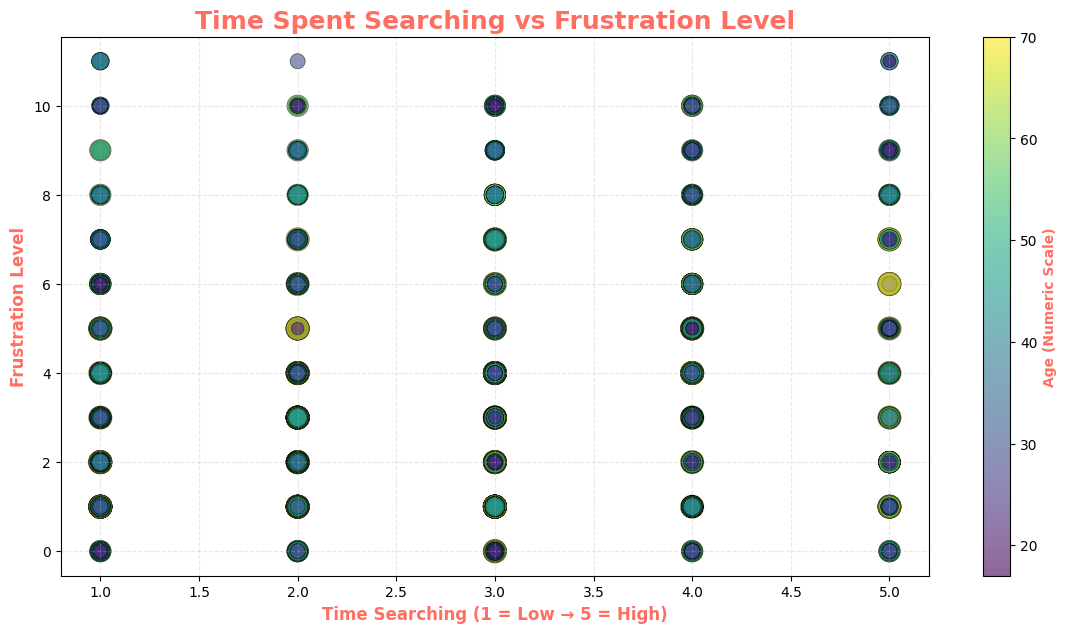

In [45]:
# Step 8: Bubble Plot of Time Searching, Frustration, and Age

# Prepare clean data
plot_data = df[['TimeSearching_Numeric', 'Frustration_Count', 'Age_Numeric']].dropna()

plt.figure(figsize=(14,7))

# Create bubble plot
scatter = plt.scatter(
    plot_data['TimeSearching_Numeric'],
    plot_data['Frustration_Count'],
    s = plot_data['Age_Numeric'] * 4,     # bubble size scaled by age
    c = plot_data['Age_Numeric'],         # color gradient by age
    cmap = 'viridis',                      # modern color palette
    alpha = 0.6,
    edgecolors='black',
    linewidth=0.5
)

# Titles and labels
plt.title("Time Spent Searching vs Frustration Level", fontsize=18, fontweight='bold', color="#FF6F61")
plt.xlabel("Time Searching (1 = Low → 5 = High)", fontsize=12, color="#FF6F61", fontweight='bold')
plt.ylabel("Frustration Level", fontsize=12, color="#FF6F61", fontweight='bold')

# Add color bar legend
cbar = plt.colorbar(scatter)
cbar.set_label("Age (Numeric Scale)", fontweight='bold',color="#FF6F61" )

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()


### Key Insigs:
* Frustration levels appear across all time-searching categories.
* Both low and high frustration are present at each time-searching level.
* No strong visible relationship between time spent searching and frustration.
* Age (bubble size) is spread across all categories, showing frustration occurs at all ages.

# ---------------------------Visualizing Composition of Data--------------------------
# Pie Charts
### Step 13: Create a pie chart of the top 5 databases(DatabaseWantToWorkWith) that respondents wish to learn next year.

In [46]:
# Step 1: Check column exists ( Make sure DatabaseWantToWorkWith is in the dataset.)
'DatabaseWantToWorkWith' in df.columns

True

In [47]:
# Step 2: Check missing values ( See how many respondents did not answer.)
df['DatabaseWantToWorkWith'].isna().sum()

np.int64(22879)

In [48]:
# Step 3: Remove missing values
db_data = df['DatabaseWantToWorkWith'].dropna()

# Verify
db_data.isna().sum()

np.int64(0)

In [49]:
# Step 4: Check number of remaining records
db_data.shape

(42558,)

In [50]:
# Step 5: Check response format
df['DatabaseWantToWorkWith'].head()

0                           NaN
1                    PostgreSQL
2    Firebase Realtime Database
3      MongoDB;MySQL;PostgreSQL
4             PostgreSQL;SQLite
Name: DatabaseWantToWorkWith, dtype: object

### Key Insights:
* Some rows are NaN → missing responses
* Some rows contain one database
* PostgreSQL
* Some rows contain multiple databases separated by semicolons
* MongoDB;MySQL;PostgreSQL

In [51]:
# Step 6: Check unique values after splitting (Make sure database names are clean (no typos or extra spaces).)
df['DatabaseWantToWorkWith'].dropna().str.split(';').explode().unique()[:10]

array(['PostgreSQL', 'Firebase Realtime Database', 'MongoDB', 'MySQL',
       'SQLite', 'Cloud Firestore', 'Supabase', 'Redis', 'Elasticsearch',
       'Microsoft SQL Server'], dtype=object)

* Database names are clean and properly separated
* No strange characters or spacing issues
* Each database is correctly extracted as an individual value

In [52]:
# Step 7: Check total response count
df['DatabaseWantToWorkWith'].dropna().str.split(';').explode().count()

np.int64(127439)

In [53]:
# Step 8: Get top 5 databases
db_flat = db_data.str.split(';').explode()
top5_databases = db_flat.value_counts().head(5)
top5_databases

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64

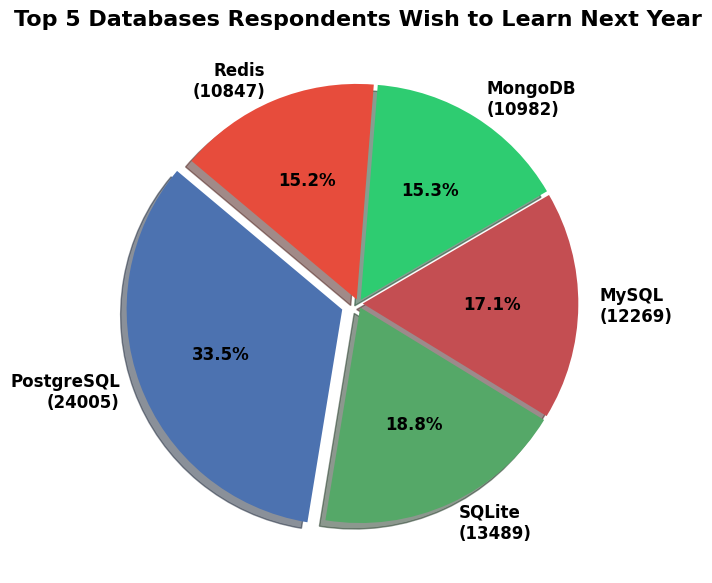

In [54]:
# Step 9: Visualizing Top 5 Databases
plt.figure(figsize=(9,7))

# Modern colour palette
colors = ['#4C72B0', '#55A868', '#C44E52', '#2ECC71', '#E74C3C']

# Properly formatted labels: Name on first line, count on second line
labels = [
    f"{db}\n({count})"
    for db, count in zip(top5_databases.index, top5_databases.values)
]

# Plot pie chart
plt.pie(
    top5_databases.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=(0.08, 0.02, 0.02, 0.02, 0.02),
    shadow=True,
    textprops={'fontsize': 12, 'fontweight':'bold'}
)

plt.title("Top 5 Databases Respondents Wish to Learn Next Year",
          fontsize=16, fontweight='bold')

plt.show()


### Key Insights:
* PostgreSQL is the most desired database (33.5%).
* SQLite is the second most popular (18.8%).
* MySQL follows closely (17.1%).
* MongoDB and Redis have similar interest (~15% each).
* PostgreSQL shows the strongest overall demand.

### Step 14: Create a stacked bar chart of median TimeSearching and TimeAnswering for the age group 25 to 45
# Stacked  Bar Charts

In [55]:
# Step 1: Check required columns exist ( Ensure these columns are in your dataset:Age_Numeric (or Age),TimeSearching_Numeric,TimeAnswering_Numeric)
required_cols = ['Age_Numeric', 'TimeSearching_Numeric', 'TimeAnswering']
all(col in df.columns for col in required_cols)


True

In [56]:
# Step 2: Check missing values
df[required_cols].isna().sum()

Age_Numeric                322
TimeSearching_Numeric    36526
TimeAnswering            36593
dtype: int64

* Age_Numeric has very few missing values → good.
* TimeSearching_Numeric has many missing values.
* TimeAnswering also has many missing values.


ge_Numeric has very few missing values → good.
TimeSearching_Numeric has many missing values.
TimeAnswering also has many missing values.


In [57]:
# Step 3: Remove missing values for required columns
clean_time_data = df[['Age_Numeric', 'TimeSearching_Numeric', 'TimeAnswering']].dropna()

# Verify
clean_time_data.isna().sum()

Age_Numeric              0
TimeSearching_Numeric    0
TimeAnswering            0
dtype: int64

In [58]:
# Step 4: Check data types
df[required_cols].dtypes

Age_Numeric              float64
TimeSearching_Numeric    float64
TimeAnswering             object
dtype: object

#### TimeAnswering is object so needs to convrt into numeric

In [59]:
# Step 5: Create TimeAnswering_Numeric

#  5.1: Mapping dictionary
time_answering_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}

# 5.2: Apply mapping
df['TimeAnswering_Numeric'] = df['TimeAnswering'].map(time_answering_mapping)

# 5.3: Verify conversion
df[['TimeAnswering', 'TimeAnswering_Numeric']].dropna().head(10)


,TimeAnswering,TimeAnswering_Numeric
10,60-120 minutes a day,4
12,15-30 minutes a day,2
15,60-120 minutes a day,4
18,30-60 minutes a day,3
20,15-30 minutes a day,2
22,15-30 minutes a day,2
24,Less than 15 minutes a day,1
26,30-60 minutes a day,3
27,15-30 minutes a day,2
31,15-30 minutes a day,2


#### The TimeAnswering column was converted from text categories into a numeric scale (1–5), enabling median calculations for visualization.

In [60]:
# Step 6: Now update required_cols
required_cols = ['Age_Numeric', 'TimeSearching_Numeric', 'TimeAnswering_Numeric']

# Verify - Data Type Check Interpretation
df[required_cols].dtypes

Age_Numeric              float64
TimeSearching_Numeric    float64
TimeAnswering_Numeric    float64
dtype: object

#### All required columns (Age_Numeric, TimeSearching_Numeric, and TimeAnswering_Numeric) are now in numeric format, making them suitable for median calculation and stacked bar chart visualization.

In [61]:
# Step 7: Remove Missing Values from Time and Age Data
clean_time_data = df[['Age_Numeric', 'TimeSearching_Numeric', 'TimeAnswering_Numeric']].dropna()

# Verify
clean_time_data.isna().sum()

Age_Numeric              0
TimeSearching_Numeric    0
TimeAnswering_Numeric    0
dtype: int64

In [62]:
# Step 8: Filter age group 25–45
age_25_45 = clean_time_data[
    (clean_time_data['Age_Numeric'] >= 25) &
    (clean_time_data['Age_Numeric'] <= 45)
]

# Verify
age_25_45['Age_Numeric'].min(), age_25_45['Age_Numeric'].max()


(np.float64(29.5), np.float64(39.5))

In [63]:
# Step 9: heck enough data avilable for plotting
age_25_45.shape


(20447, 3)

In [64]:
# Step 10: Calculate medians
median_search = age_25_45['TimeSearching_Numeric'].median()
median_answer = age_25_45['TimeAnswering_Numeric'].median()
median_search , median_answer

(np.float64(3.0), np.float64(2.0))

### Key Insights:
* We already created time_answering_mapping based on it can say
* Median TimeSearching = 3 → Typical respondents aged 25–45 spend 30–60 minutes a day searching.
* Median TimeAnswering = 2 → Typical respondents aged 25–45 spend 15–30 minutes a day answering.

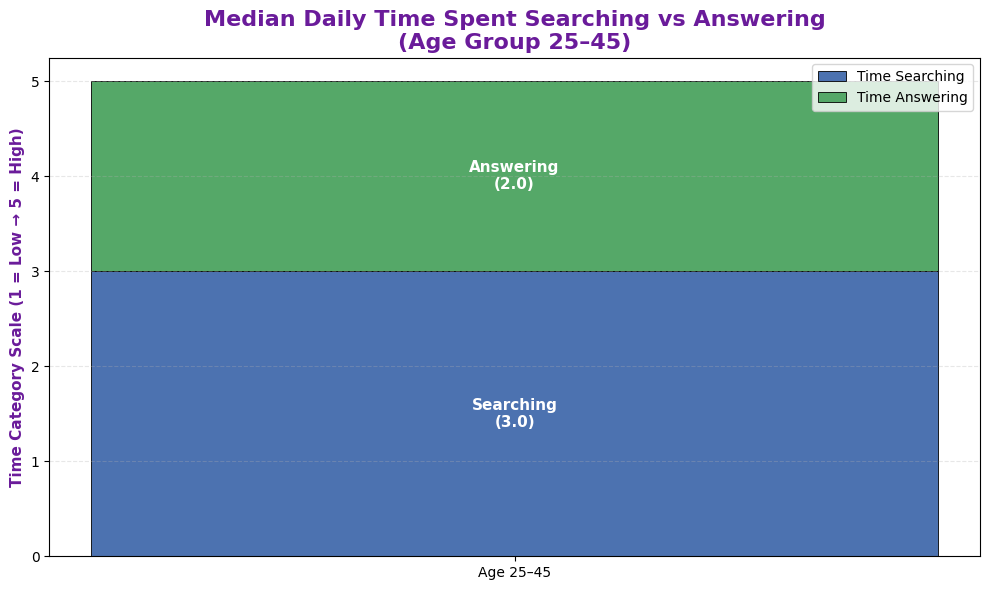

In [65]:
# Step 10: 
plt.figure(figsize=(10,6))

# Colors chosen for modern clean look
color_search = '#4C72B0'   # professional blue
color_answer = '#55A868'   # modern green

# Plot stacked bars
plt.bar('Age 25–45', median_search,
        label='Time Searching',
        color=color_search,
        edgecolor='black',
        linewidth=0.6)

plt.bar('Age 25–45', median_answer,
        bottom=median_search,
        label='Time Answering',
        color=color_answer,
        edgecolor='black',
        linewidth=0.6)

# Titles and labels
plt.title("Median Daily Time Spent Searching vs Answering\n(Age Group 25–45)",
          fontsize=16, fontweight='bold', color="#6A1B9A")

plt.ylabel("Time Category Scale (1 = Low → 5 = High)", fontsize=11,fontweight='bold', color="#6A1B9A" )

# Add value labels on bars
plt.text(0, median_search/2,
         f"Searching\n({median_search})",
         ha='center', va='center', color='white', fontsize=11, fontweight='bold')

plt.text(0, median_search + median_answer/2,
         f"Answering\n({median_answer})",
         ha='center', va='center', color='white', fontsize=11, fontweight='bold')

# Legend
plt.legend(loc='upper right')

# Clean background
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Key Insights:
* Respondents aged 25–45 spend more time searching for solutions than answering questions.
* Median time spent searching is in the 30–60 minutes range.
* Median time spent answering is in the 15–30 minutes range.

# --------------------------------Visualizing Comparison of Data-------------------

# Line Chart

### Step 15: Plot the median CompTotal for all ages from 45 to 60.

In [66]:
# Step 1: Check required columns exist
required_cols = ['Age_Numeric', 'CompTotal']
all(col in df.columns for col in required_cols)

True

In [67]:
# Step 2: Check missing values
df[required_cols].isna().sum()

Age_Numeric      322
CompTotal      31697
dtype: int64

##### For plotting median CompTotal by age, we must use only rows where both Age_Numeric and CompTotal

In [68]:
# Step 3: Clean data for line chart
comp_age_data = df[['Age_Numeric', 'CompTotal']].dropna()

# Verify
comp_age_data[required_cols].isna().sum()

Age_Numeric    0
CompTotal      0
dtype: int64

In [69]:
# Step 4: Check data types
comp_age_data.dtypes

Age_Numeric    float64
CompTotal      float64
dtype: object

#### Both Age and CompTotal are numeric, so they are ready for statistical calculations and line chart plotting.

In [70]:
# Step 5: Check value ranges (min & max
comp_age_data['Age_Numeric'].min(), comp_age_data['Age_Numeric'].max()

(np.float64(17.0), np.float64(70.0))

#### Dataset contains respondents aged from 17 to 70, so the target range 45–60 is fully available for analysis.

In [71]:
# Step 6: Filter ages 45–60
age_45_60 = comp_age_data[
    (comp_age_data['Age_Numeric'] >= 45) &
    (comp_age_data['Age_Numeric'] <= 60)
]

# Verify filtered data
age_45_60['Age_Numeric'].min(), age_45_60['Age_Numeric'].max()


(np.float64(49.5), np.float64(59.5))

In [72]:
# Step 7: check data is sufficient
age_45_60.shape

(4795, 2)

#### Data is sufficient

In [73]:
# Step 8: Calculate median CompTotal for each age
# Group by Age and calculate median compensation
median_comp_by_age = age_45_60.groupby('Age_Numeric')['CompTotal'].median()

# View result
median_comp_by_age

Age_Numeric
50   130,000
60   135,000
Name: CompTotal, dtype: float64

#### Ages are  stores as  age bands, which are converted to midpoints:Thus, the median calculation returns two points.

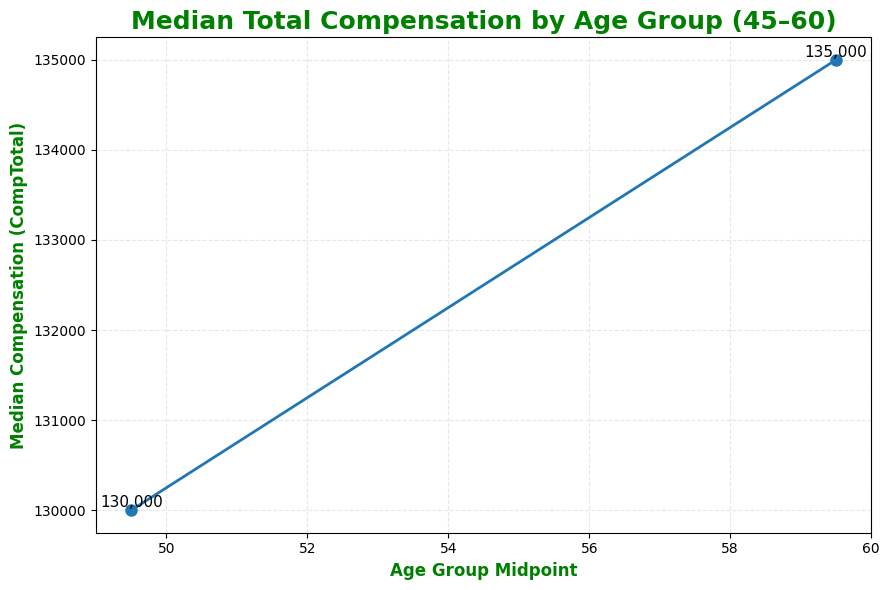

In [74]:
# Step 9: Line chart - Median Total Compensation by Age Group (45-60)
plt.figure(figsize=(9,6))

plt.plot(
    median_comp_by_age.index,
    median_comp_by_age.values,
    marker='o',
    linewidth=2,
    markersize=8
)

# Title and labels
plt.title("Median Total Compensation by Age Group (45–60)",
          fontsize=18, fontweight='bold', color="green")

plt.xlabel("Age Group Midpoint", fontsize=12, fontweight='bold', color="green")
plt.ylabel("Median Compensation (CompTotal)", fontsize=12, fontweight='bold', color="green")

# Add value labels on points
for x, y in zip(median_comp_by_age.index, median_comp_by_age.values):
    plt.text(x, y, f"{int(y):,}", ha='center', va='bottom', fontsize=11)

# Light grid for modern look
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### Key Insights:

* Median compensation at ages 45–54 is 130,000.
* Median compensation at ages 55–64 is 135,000.
* Compensation shows a slight increase (Upward trend) with age in senior groups.


# Horizontal Bar Chart

## Step 16: Create a horizontal bar chart using the MainBranch column.
The column MainBranch contains respondents’ primary role

In [75]:
# Step 1: Check column exists
'MainBranch' in df.columns

True

In [76]:
# Step 2: Check missing values
df['MainBranch'].isna().sum()

np.int64(0)

In [77]:
# Step 3: Inspect sample values
df['MainBranch'].dropna().head()

0    I am a developer by profession
1    I am a developer by profession
2    I am a developer by profession
3             I am learning to code
4    I am a developer by profession
Name: MainBranch, dtype: object

#### The MainBranch column contains clear textual categories representing respondents’ primary roles, confirming correct data format for role distribution analysis.

In [78]:
# Step 4: Check unique roles
df['MainBranch'].dropna().unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

#### Your MainBranch column is clean and well-structured.

In [79]:
# Step 5: Count responses per role
df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

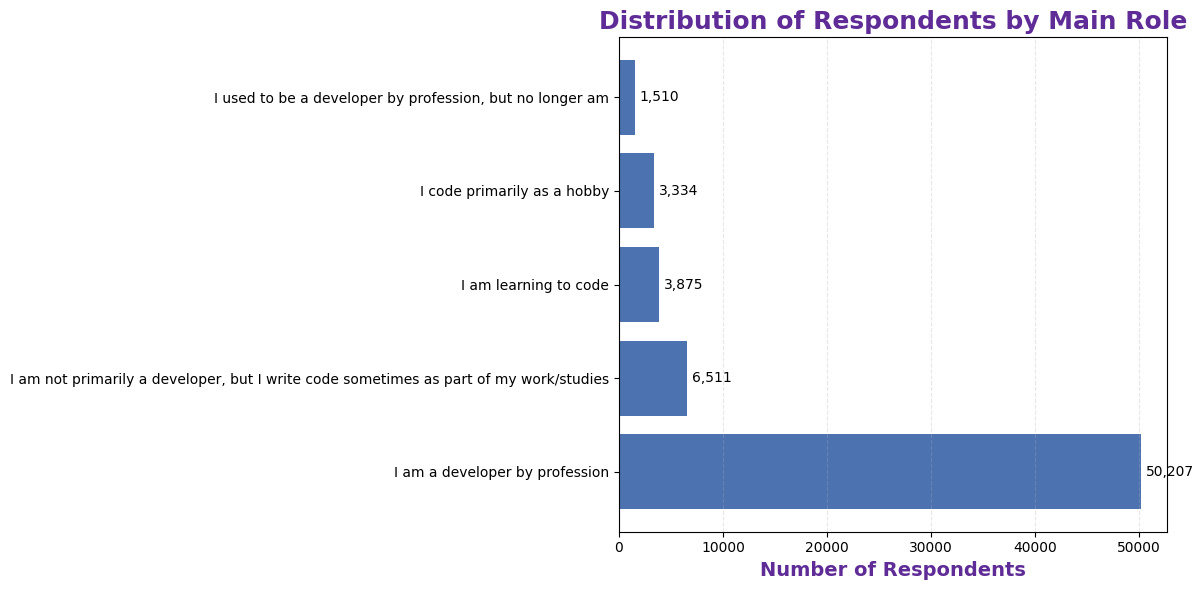

In [80]:
# Step 6: Horizontal Bar Chart of MainBranch


# Store role counts
role_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(12,6))

plt.barh(
    role_counts.index,
    role_counts.values,
    color='#4C72B0'
)

# Add value labels
for index, value in enumerate(role_counts.values):
    plt.text(value + 500, index, f"{value:,}", va='center', fontsize=10)

# Titles and labels
plt.title("Distribution of Respondents by Main Role", fontsize=18, fontweight='bold', color= "#5E2B97")
plt.xlabel("Number of Respondents",color="#5E2B97", fontweight='bold', fontsize=14)

# Clean layout
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()


### Key Insights:
* Most respondents are developers by profession (50,207).
* Some respondents write code as part of work/studies (6,511).
* Many respondents are learning to code (3,875).
* A smaller group code as a hobby (3,334).
* The fewest respondents are former professional developers (1,510).